Import required packages

In [1]:
# import packages
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np # NumPy
from PIL import Image # Python Image Library (PIL) https://pillow.readthedocs.io/en/stable/ - to load images 
import glob # Python module for pathnames https://docs.python.org/3/library/glob.html - to find files in folder

define function to compute integral image

In [174]:
# function for integral image
def integral_img(img):
  h, w = img.shape
  iimg = np.zeros((h,w))
  for y in np.arange(h):
      for x in np.arange(w):
          #iimg[y,x] = img[y,x] + iimg[x-1, y] + iimg[x, y-1] - iimg[x-1, y-1]
          iimg[x,y] = img[x,y] + iimg[x-1,y] + iimg[x,y-1] - iimg[x-1,y-1]
  return iimg
# Practice problem: [vectorize] above function!

load + generate positive/negative dataset

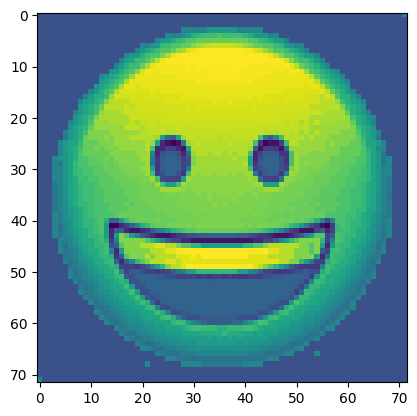

In [175]:
# load positive dataset of emojis
# dataset from https://www.kaggle.com/datasets/subinium/emojiimage-dataset
#pos_db_path = 'trainingdata/faces/*.png'
pos_db_path = '../CV/data/1.png'  #가져올 이미지 임의 설정
pos_imgs = []
for filename in glob.glob(pos_db_path):
  im = np.asarray(Image.open(filename).convert('L'))
  im = im / im.max()
  plt.imshow(im)
  pos_imgs.append(im)
img_h, img_w = pos_imgs[0].shape
n_pos_imgs = len(pos_imgs)

In [176]:
print(n_pos_imgs)

1


In [177]:
# generate negative dataset of random images
n_neg_imgs = 30 # change as you see fit
neg_imgs = []
for i in range(n_neg_imgs):
  rand_img = np.random.random((img_h, img_w))
  neg_imgs.append(rand_img)
print(np.array(neg_imgs).shape)

(30, 72, 72)


define function to compute value of haar-like feature for a given position and size, for the input integral image  

[figure of haar-like feature types](https://www.researchgate.net/profile/Alexander-Verl/publication/220758206/figure/fig5/AS:667707594768386@1536205304141/The-three-basic-Haar-like-feature-types-Pixels-of-an-image-subregion-covered-by-the.jpg)

In [178]:
# function to compute haar-like feature 
def haarlike_type1_hor(iimg,x,y,w,h):
  # compute value
  first_box_white = iimg[x,y-(int)(h/2)] + iimg[x-w,y-h] - iimg[x,y-h] - iimg[x-w,y-(int)(h/2)]
  second_box_black = iimg[x,y] + iimg[x-w, y-(int)(h/2)] - iimg[x,y-(int)(h/2)] - iimg[x-w, y]
  val = first_box_white - second_box_black
  return val

# function to compute haar-like feature 
def haarlike_type1_ver(iimg,x,y,w,h):
  # compute value
  first_box_white = iimg[x-(int)(w/2),y] + iimg[x-w,y-h] - iimg[x-(int)(w/2),y-h] - iimg[x-w,y]
  second_box_black = iimg[x,y] + iimg[x-(int)(w/2),y-h] - iimg[x,y-h] - iimg[x-(int)(w/2),y]
  val = first_box_white - second_box_black
  return val

Look for haar-like feature corresponding to forehead-eye position for images in the positive and negative sets and compare values

In [179]:
# vary values x,y,w,h
x = 40 # vary value
y = 40 # vary value
w = 12 # vary value
h = 12 # vary value
haar_vals_pos, haar_vals_neg = [], []
for i in range(n_pos_imgs):
  iimg = integral_img(pos_imgs[i]) #call integral_img()
  haar_vals_pos.append(haarlike_type1_hor(iimg,x,y,w,h))
for i in range(n_neg_imgs):
  iimg = integral_img(neg_imgs[i]) #call integral_img()
  haar_vals_neg.append(haarlike_type1_hor(iimg,x,y,w,h))
print(haar_vals_pos)
print(haar_vals_neg)

[-1.1274900398403815]
[4.7126929516725795, 2.9391938415640197, -1.93746179884306, 1.6568664041475358, -3.4464506301723077, -0.5282100763980679, -5.745076170827588, -0.8838860874627699, 2.142783722550803, -3.8336465721486093, -2.1263833177001743, 1.4218087144267884, -5.638811835693787, -2.0648439398545406, 4.963576062899733, -1.5299942884726079, 7.3161594842001705, -5.542897339676415, 0.7401828192504354, 4.758401727069554, -2.7020994616333383, -0.4318069274397658, 2.0640234457280258, -2.7121265118954625, 2.1940472651177743, -5.029745414425975, 4.424073063591209, -1.801918140165867, -0.7705852671673483, -0.18727351353038557]


What is an appropriate threshold value to divide positive and negative images for this particular haar-like feature?

In [180]:
# set threshold dividing positive and negative values computed above


Try to automate search for best haar-like feature that distinguishes between positive and negative images using brute-force search from for loops

In [181]:
# use for loops on x, y, w, h 
# --> find N best type2 horizontal haar-like features
# --> and the appropriate thresholds
# --> (what if the direction of operator < , > must change?)
# --> store as tuple (x,y,w,h,threshold,sign)
haar_feat_classifiers = []

haar_feat_classifiers.append()


TypeError: list.append() takes exactly one argument (0 given)

In [ ]:
print(len(haar_feat_classifiers))

define function for classification using haar-like feature for given image

In [ ]:
def haar_feat_classify(img, haar_feat):
  x = haar_feat[0]
  y = haar_feat[1]
  w = haar_feat[2]
  h = haar_feat[3]
  threshold = haar_feat[4]
  sign = haar_feat[5]
  if haarlike_type1_ver(img,x,y,w,h)*sign > threshold*sign:
    return True
  else:
    return False

Let's test how the haar-like features we found work on random image

In [ ]:
# construct test image: initialize large random image and insert emoji
timg_w = img_w*2
timg_h = img_h*2
test_image = np.random.random((timg_h,timg_w))
testimg = np.asarray(Image.open('trainingdata/faces/test/*.png').convert('L'))
testimg = testimg / testimg.max()
insert_coord_x, insert_coord_y = 8, 60
test_image[insert_coord_y:insert_coord_y+img_h, insert_coord_x:insert_coord_x+img_w] = testimg

plt.imshow(test_image)

In [ ]:
# perform sliding window search on test image
# (assume image size equal to image sizes in training dataset)
det_pos_list = []
for i in range(timg_h - img_h):
  for j in range(timg_w - img_w):
    # crop image patch of size (img_h,img_w)
    img_patch = test_image[i:i+img_h,j:j+img_w]
    for k in range(len(haar_feat_classifiers)):
      if haar_feat_classify(img_patch, haar_feat_classifiers[k]):
        det_pos_list.append((i,j))